In [1]:
%load_ext autoreload
%autoreload 2

In [1]:
from collections import defaultdict
from pathlib import Path
import json
import random

In [ ]:
from kg.utils.constants import ARTIFACTS_DIR
from kg.plotting.plotting import find_results_files, organize_results, plot_metric

In [3]:
base_experiments_dir = ARTIFACTS_DIR / "experiments_fmra"
layers_setting = "all_layers"
base_experiments_dir = base_experiments_dir / layers_setting

In [4]:
allow_smoke_test = False
all_my_results_files = find_results_files(base_experiments_dir, allow_smoke_test)

Found 123 'results.json' files.


In [16]:
top_k = 100
organized_results = organize_results(all_my_results_files, base_experiments_dir, top_k=top_k)

Attempted to parse 123 files.
Successfully parsed 123 paths and calculated metrics for 123.
Organized data into 1 datasets.


In [17]:
filtered_data = organized_results

In [18]:
core_patches_only = False
short_title = True
save = True

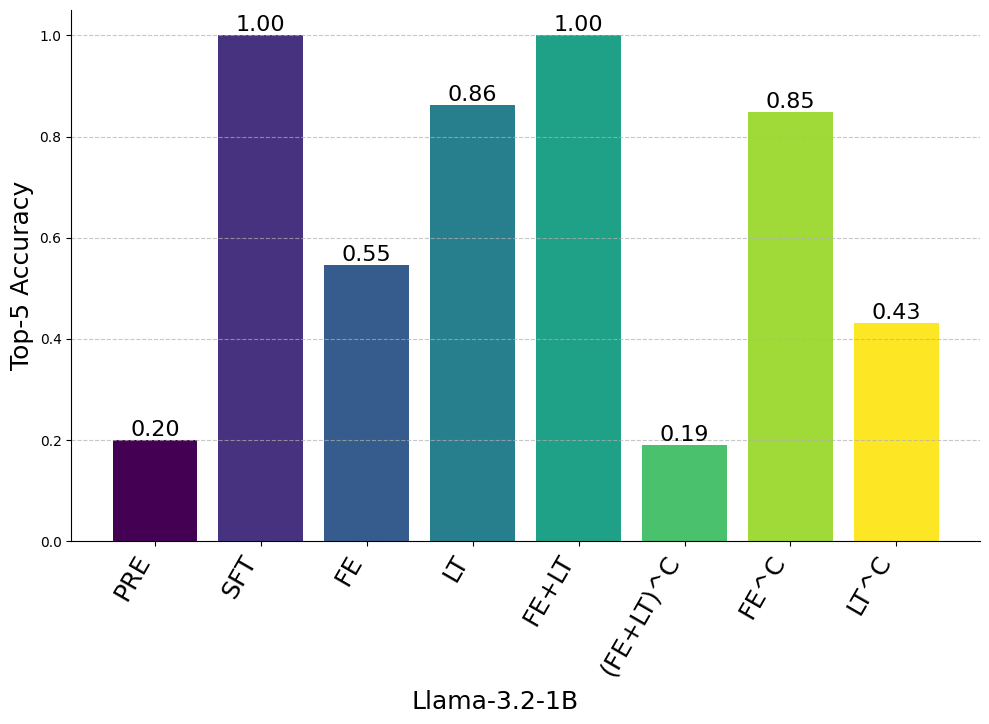

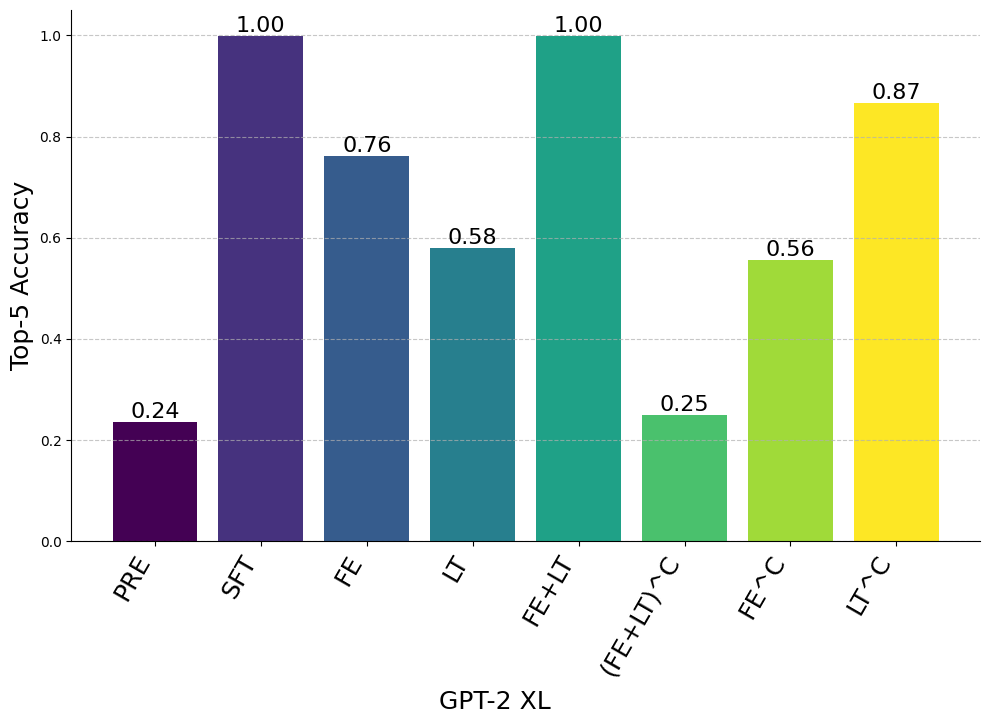

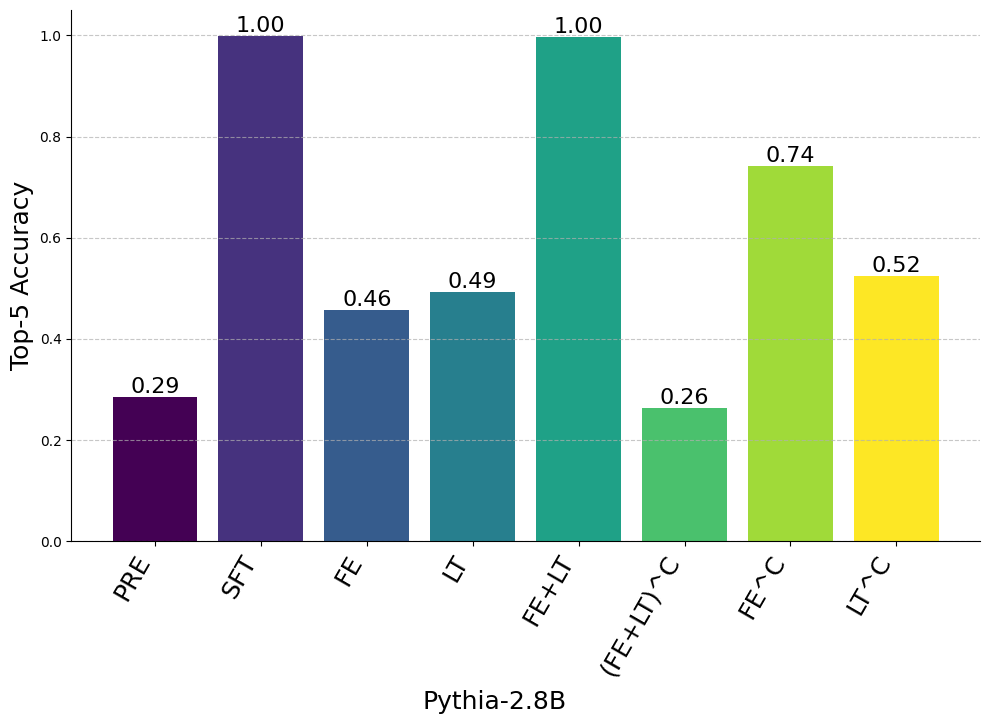

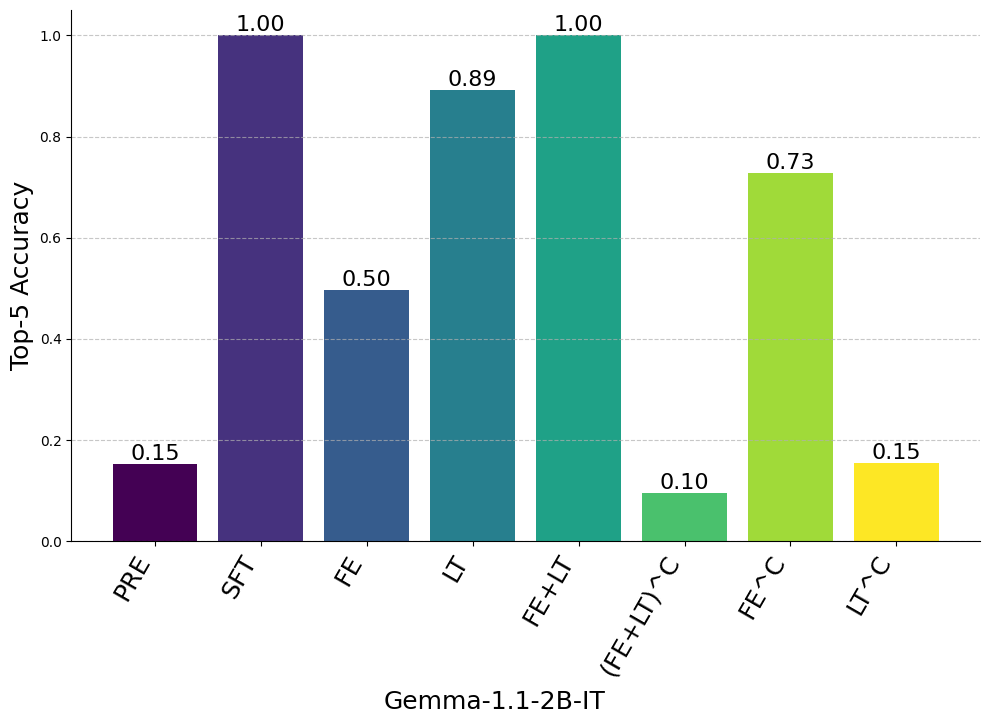

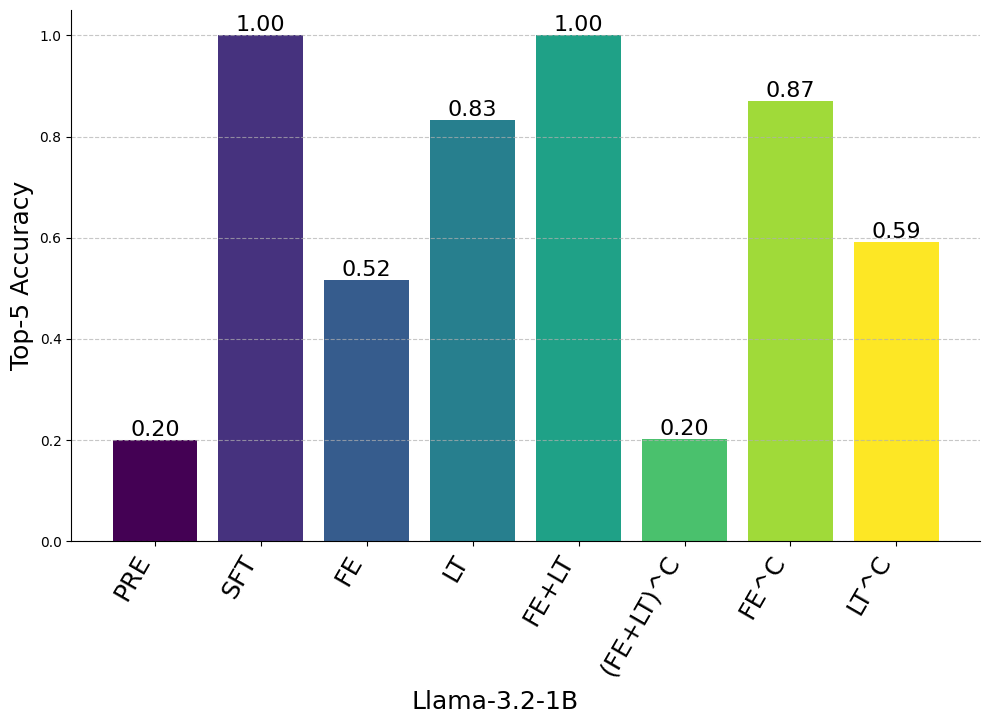

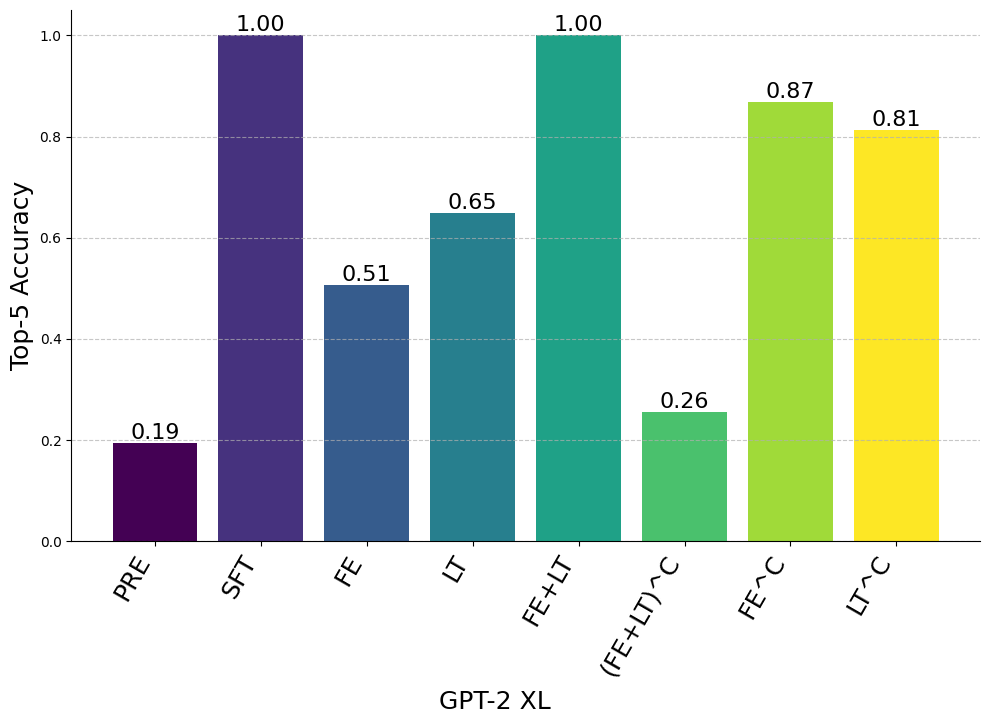

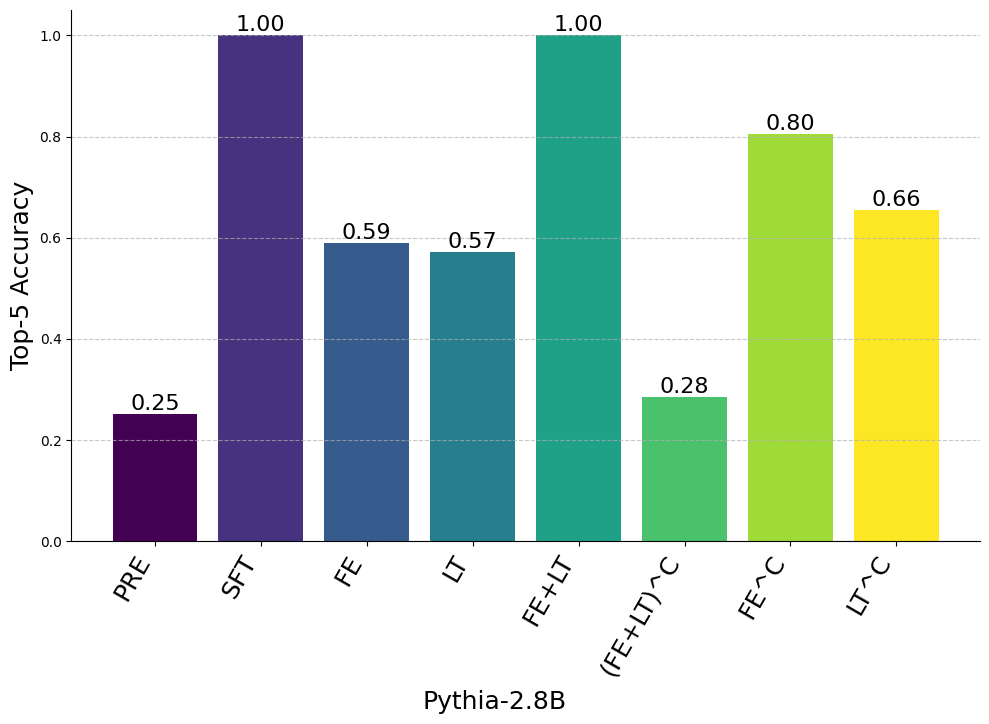

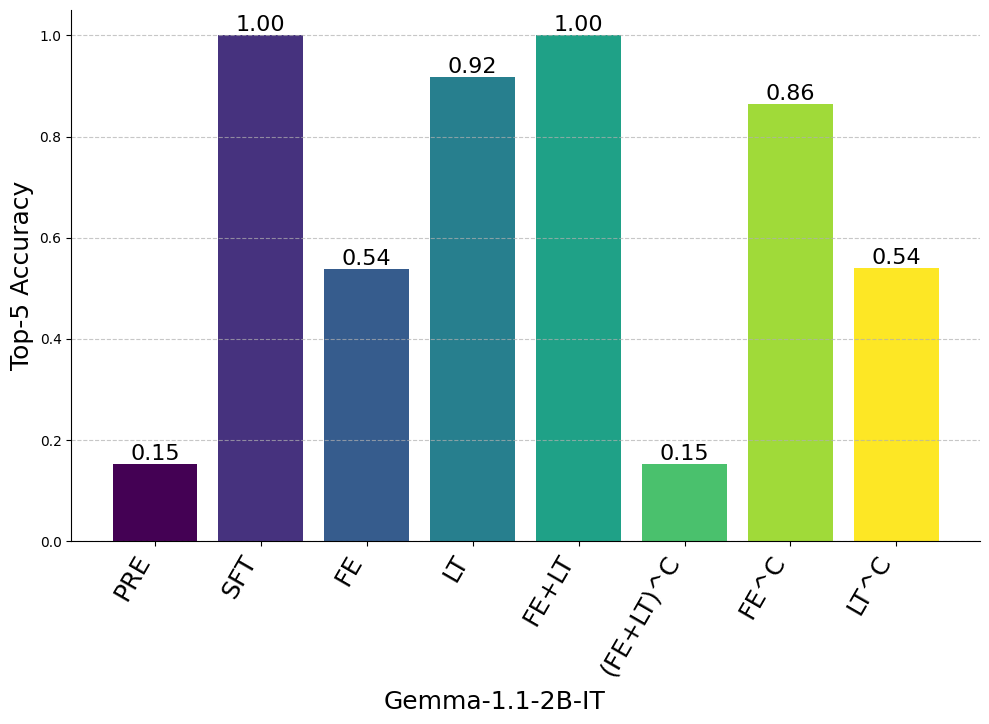

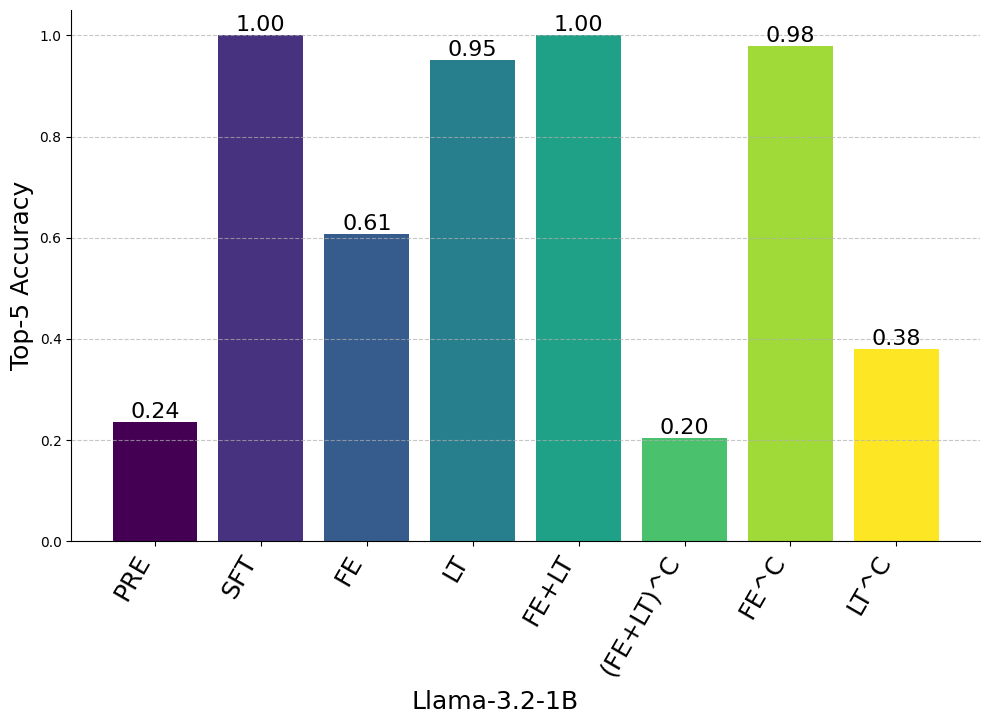

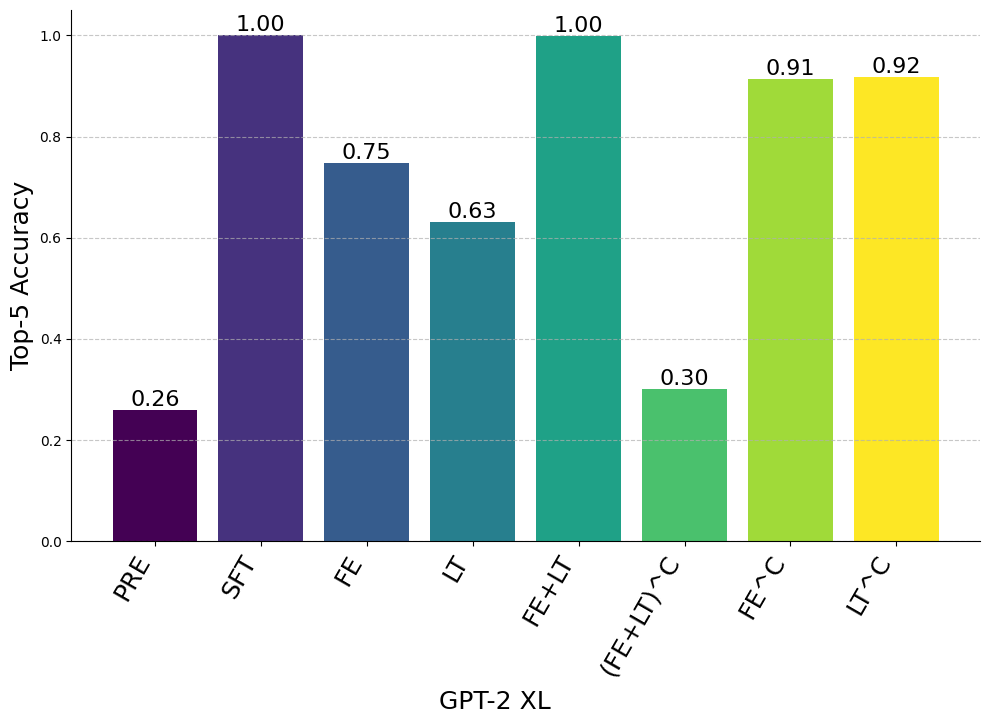

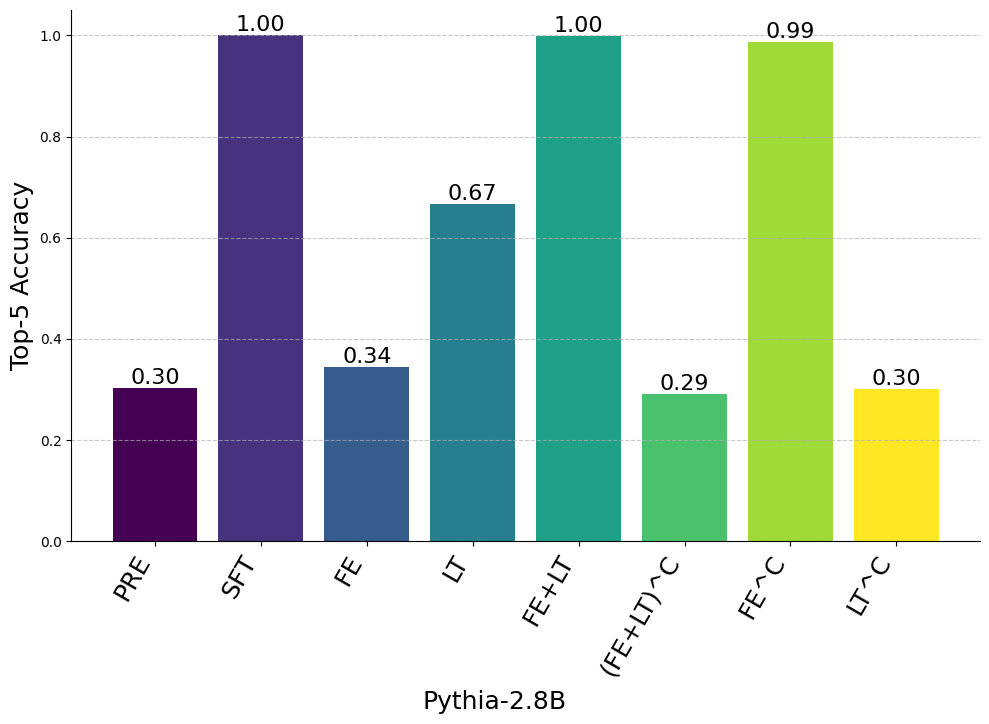

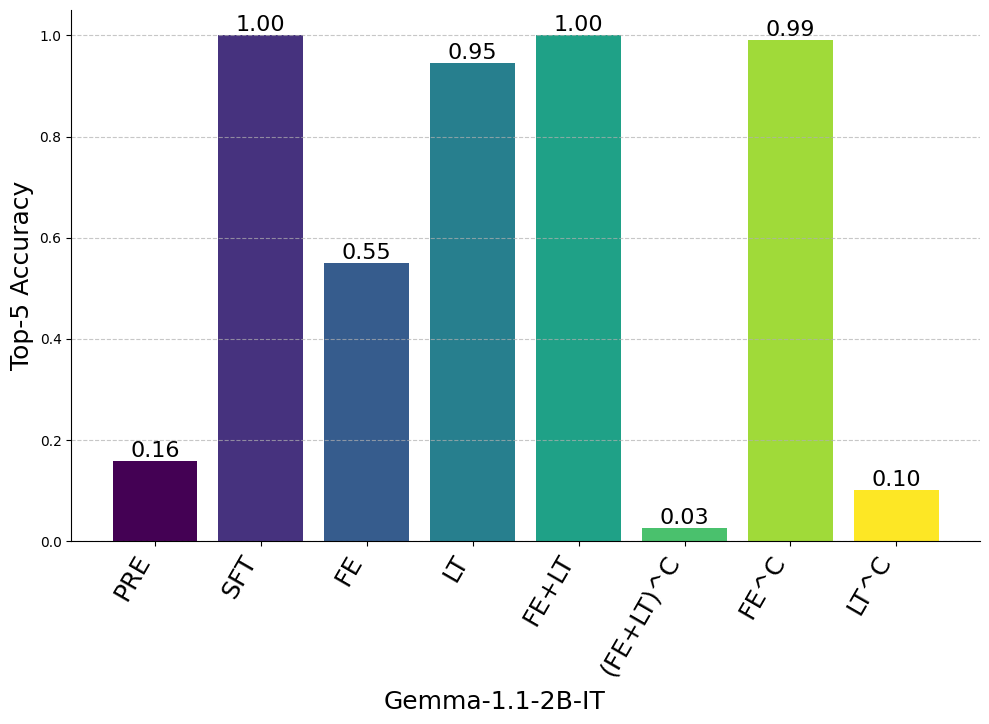

In [19]:
metric_key = "top_k_accuracy"
plot_metric(filtered_data, metric_key, layers_setting=layers_setting, save=save, core_patches_only=core_patches_only, short_title=short_title)

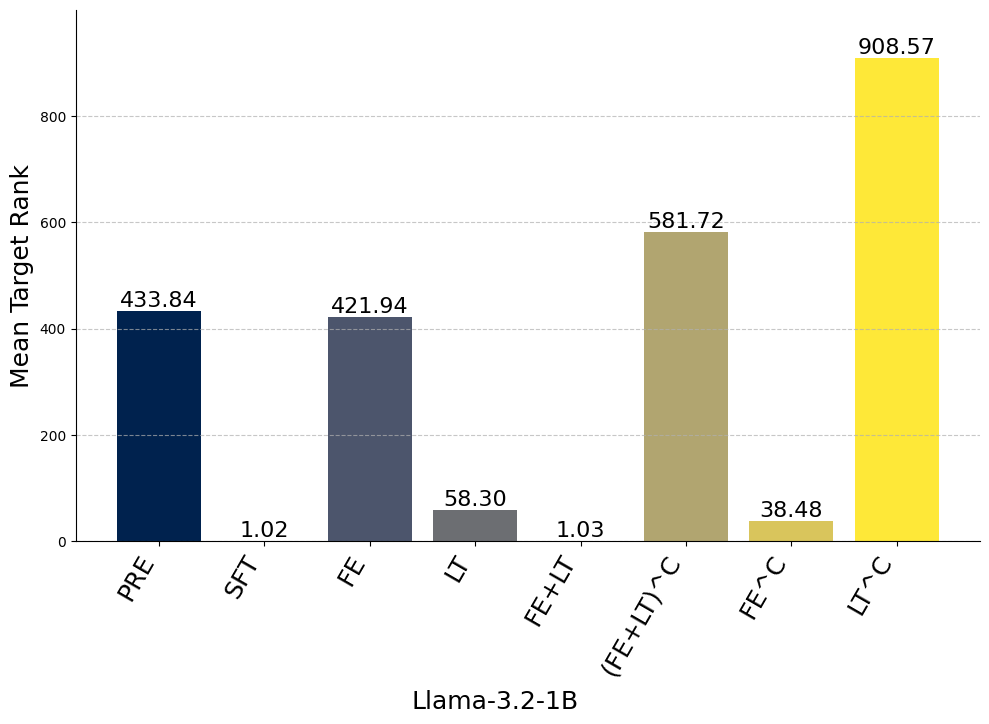

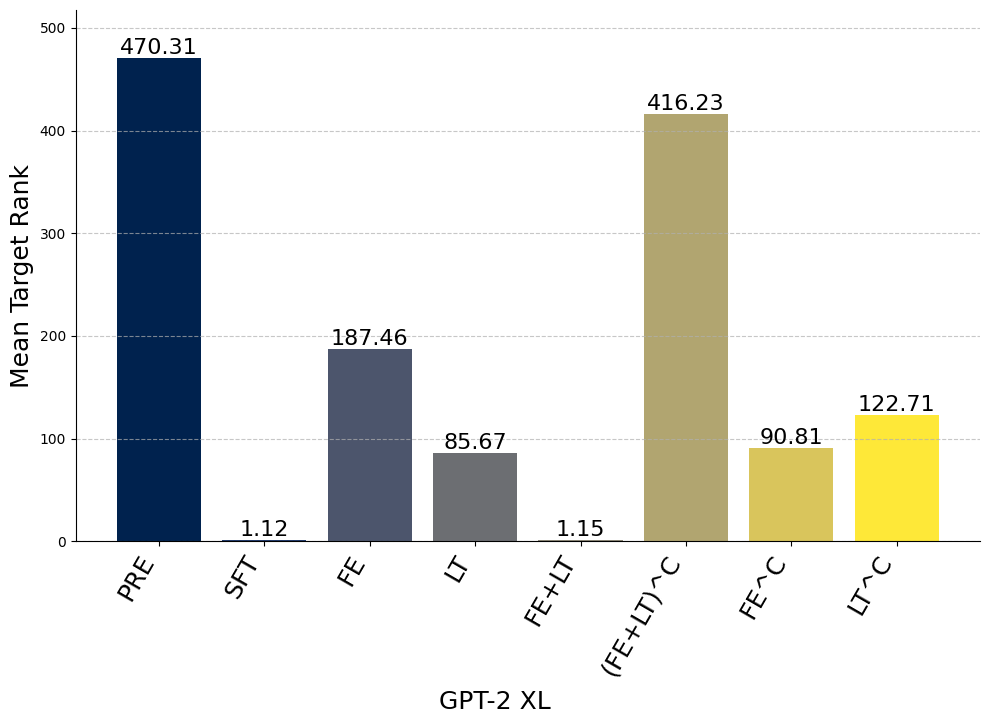

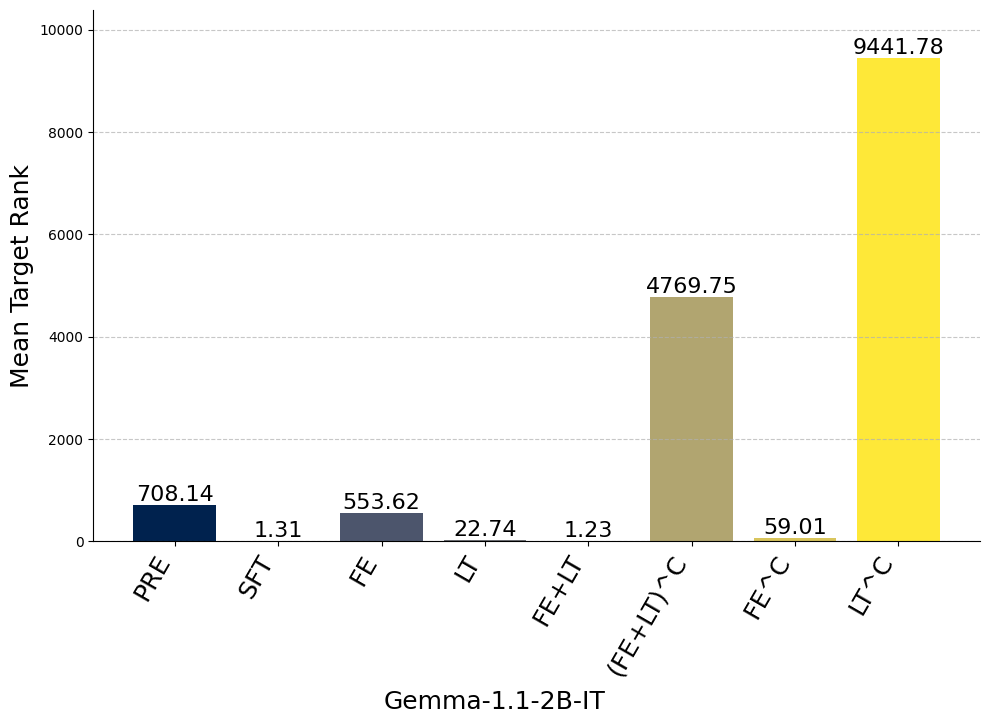

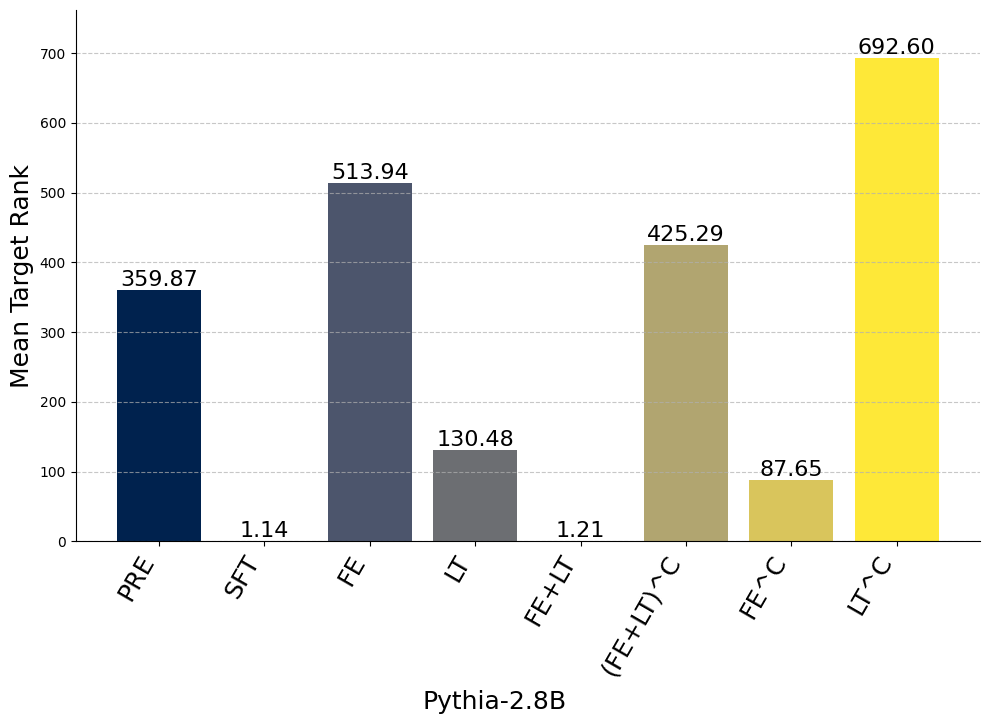

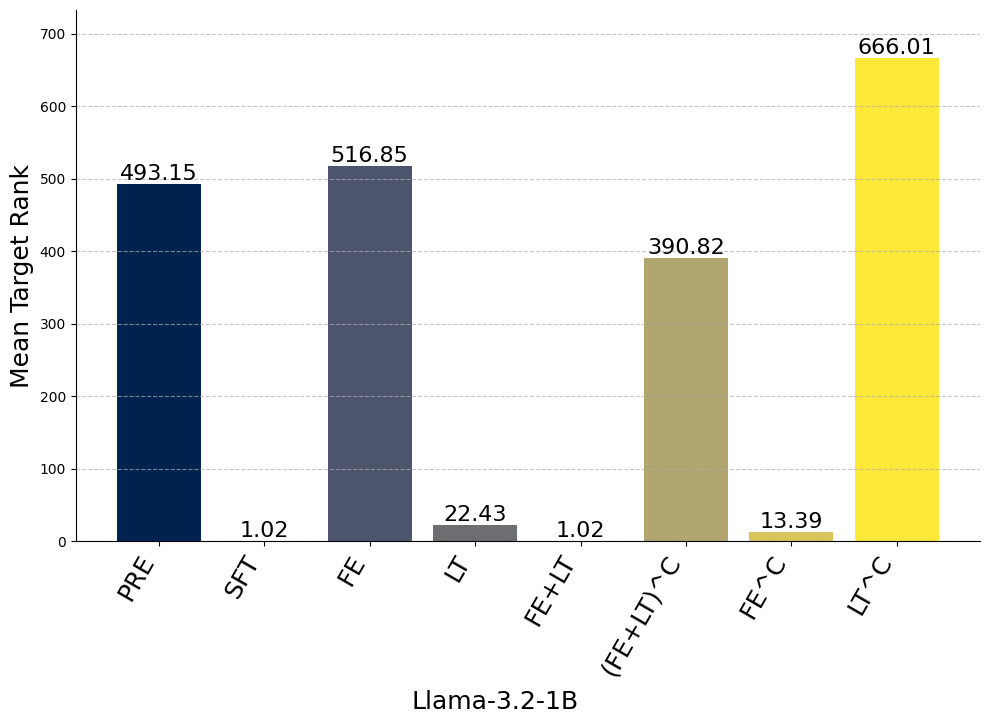

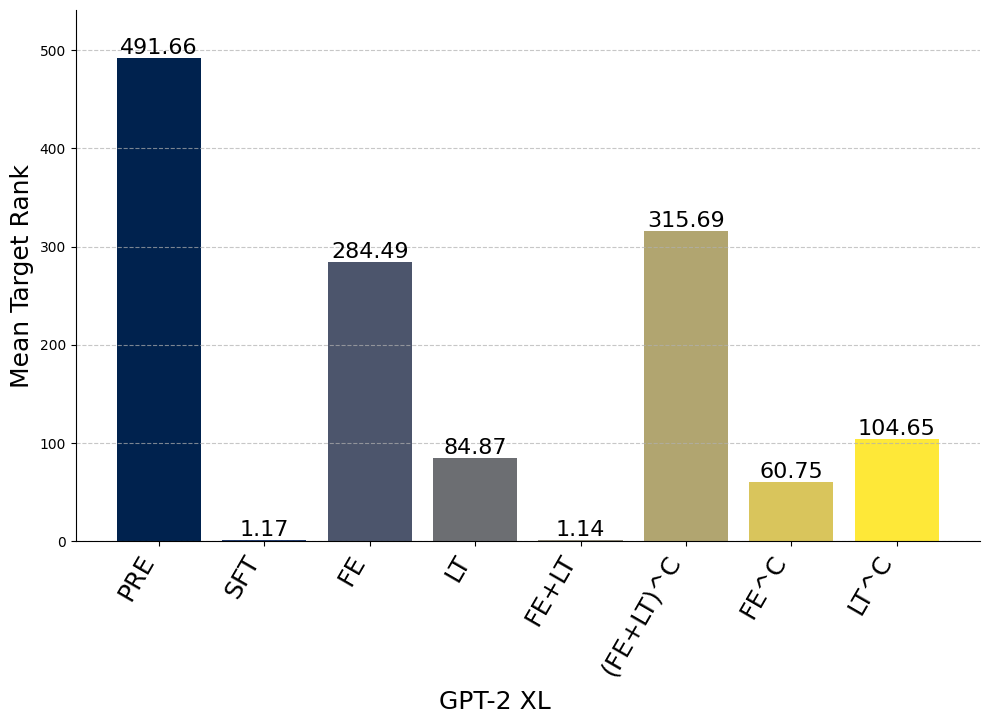

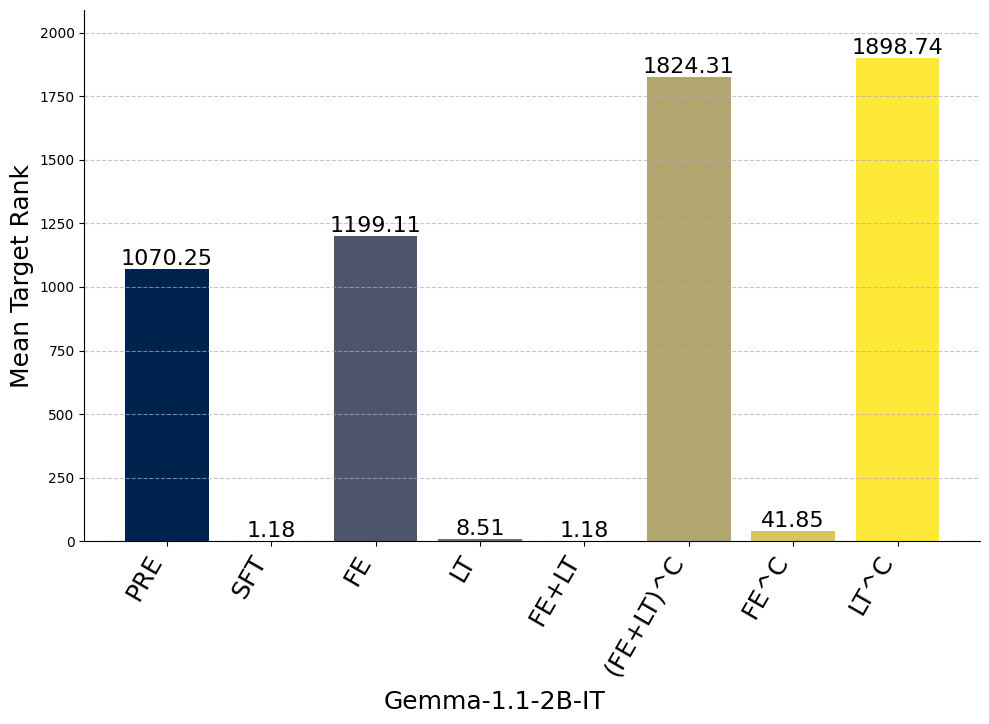

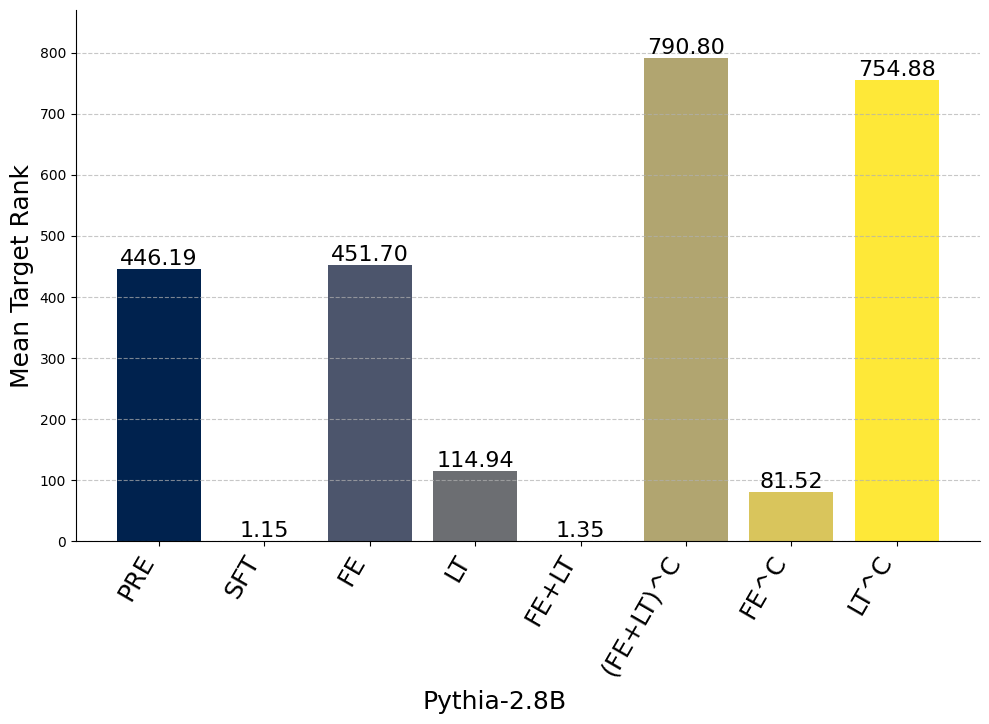

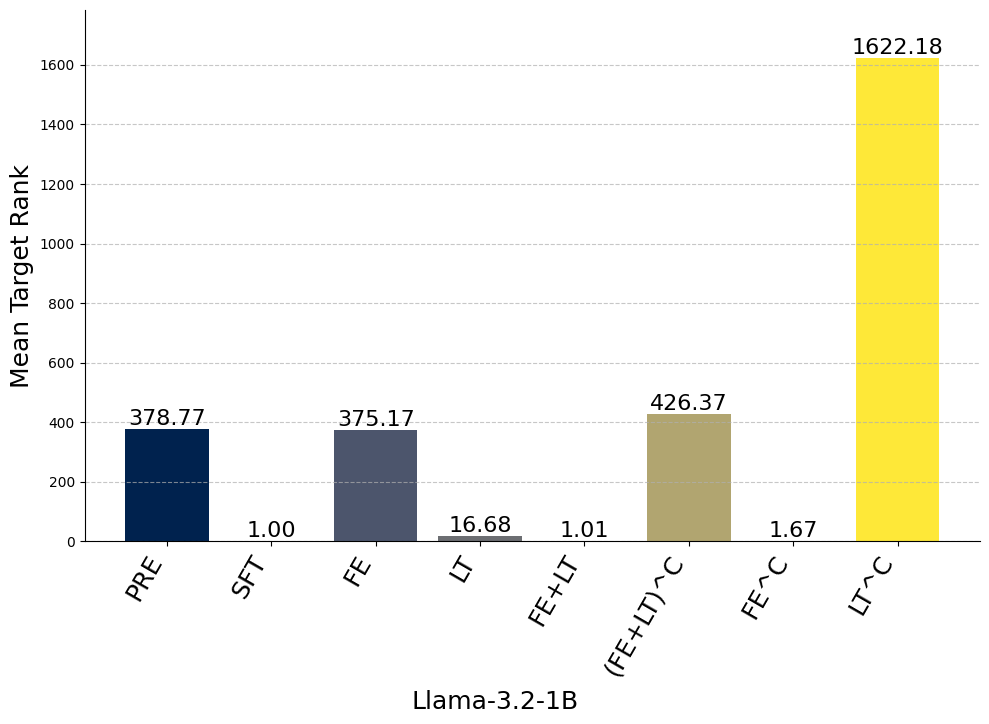

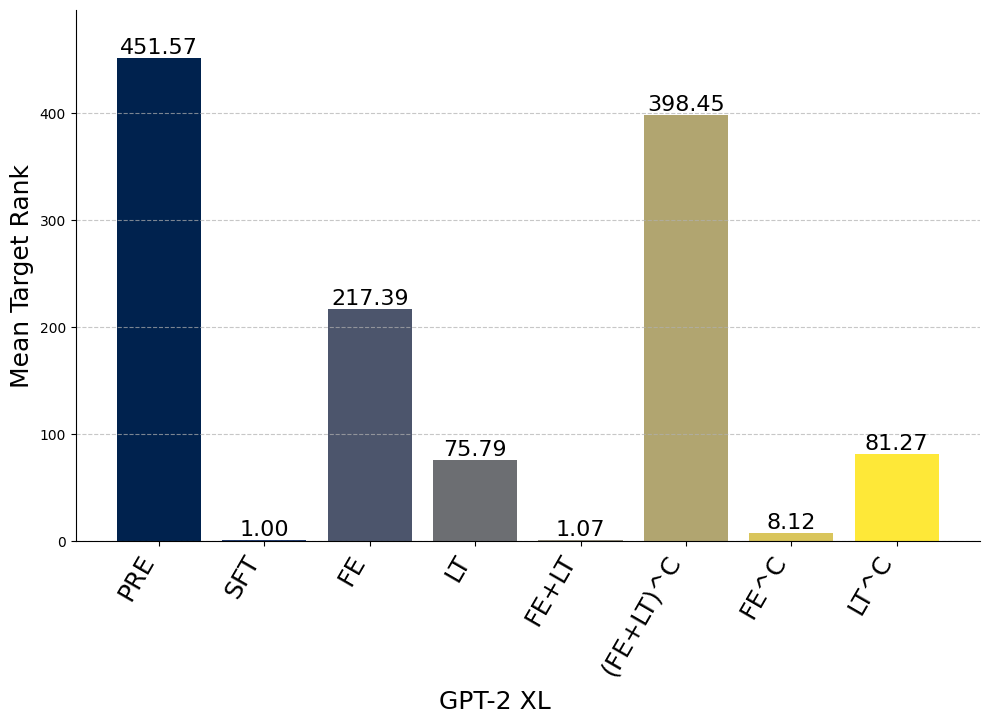

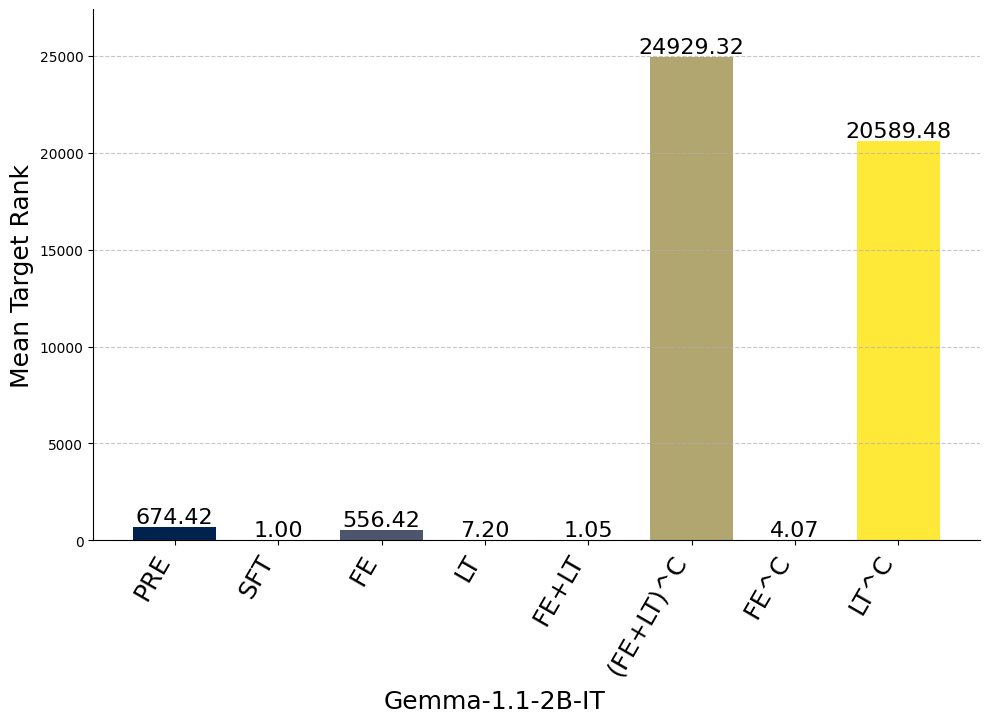

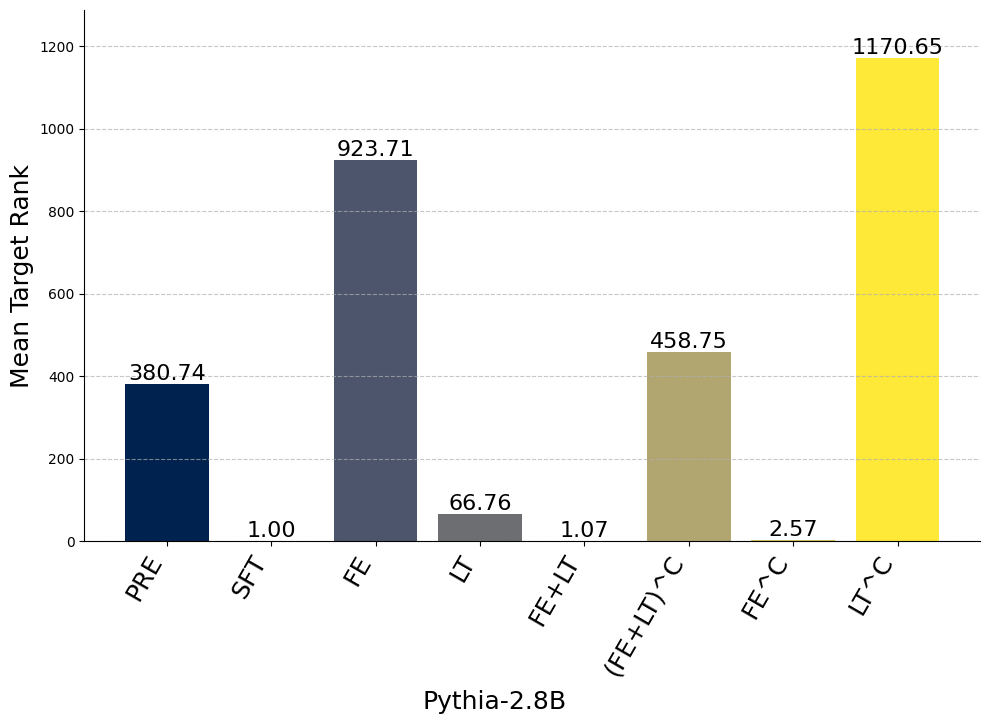

In [74]:
metric_key = "mean_target_rank"
plot_metric(organized_results, metric_key, layers_setting=layers_setting, save=save, core_patches_only=core_patches_only, short_title=short_title)

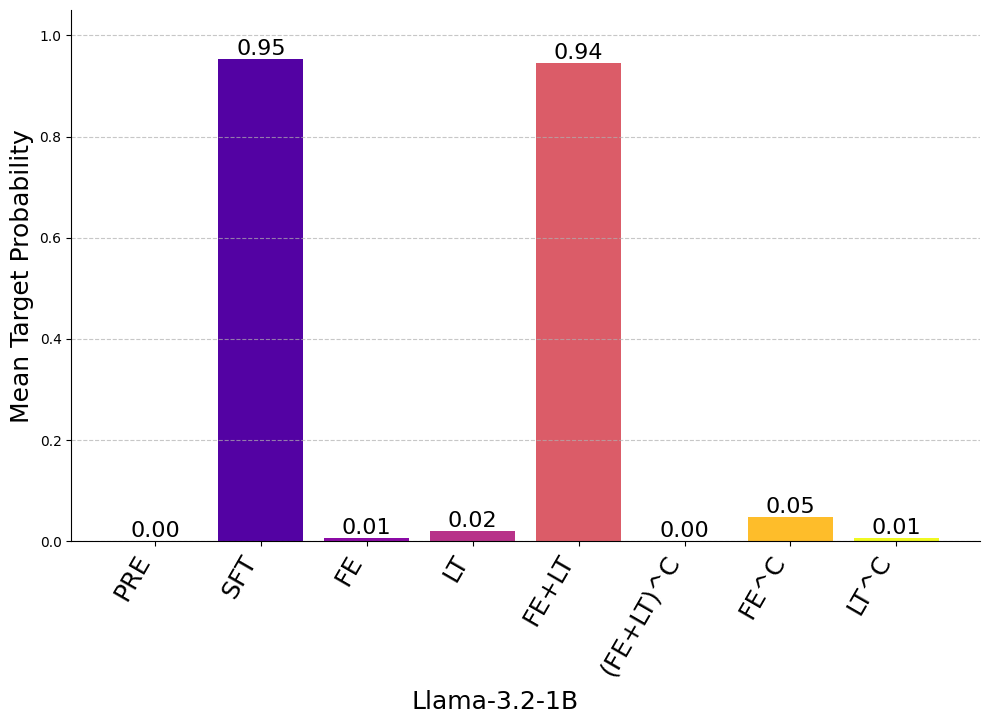

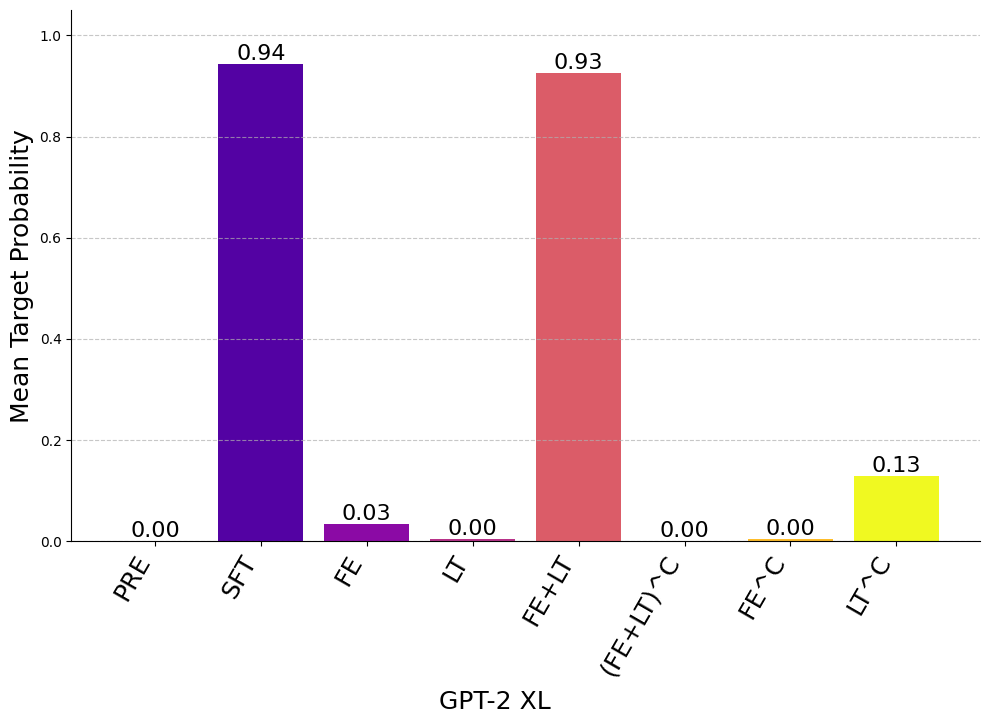

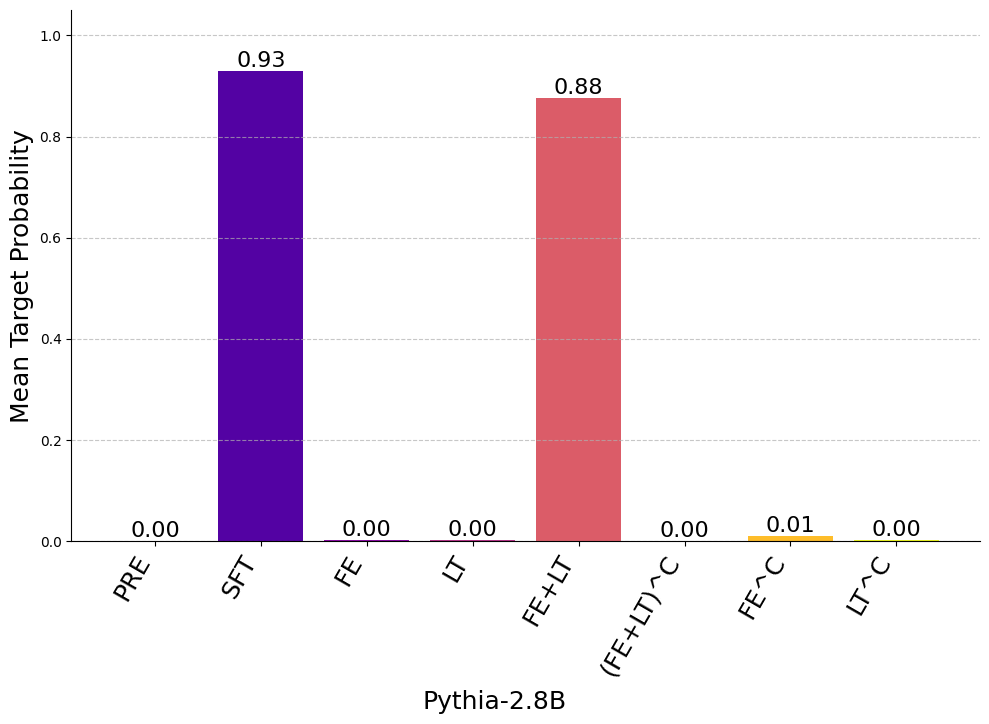

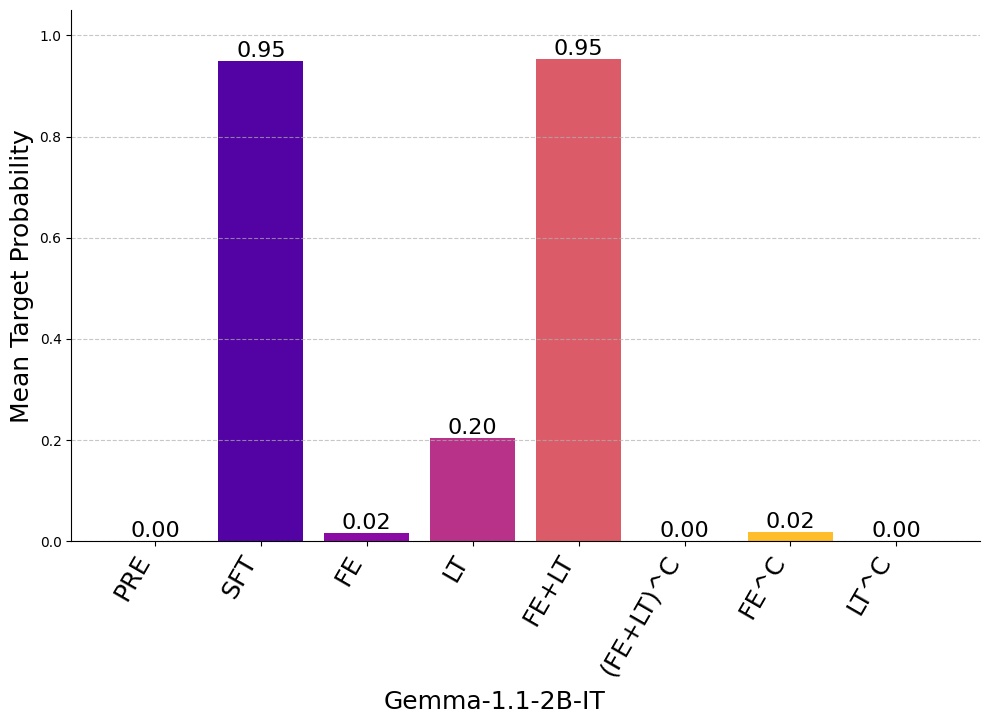

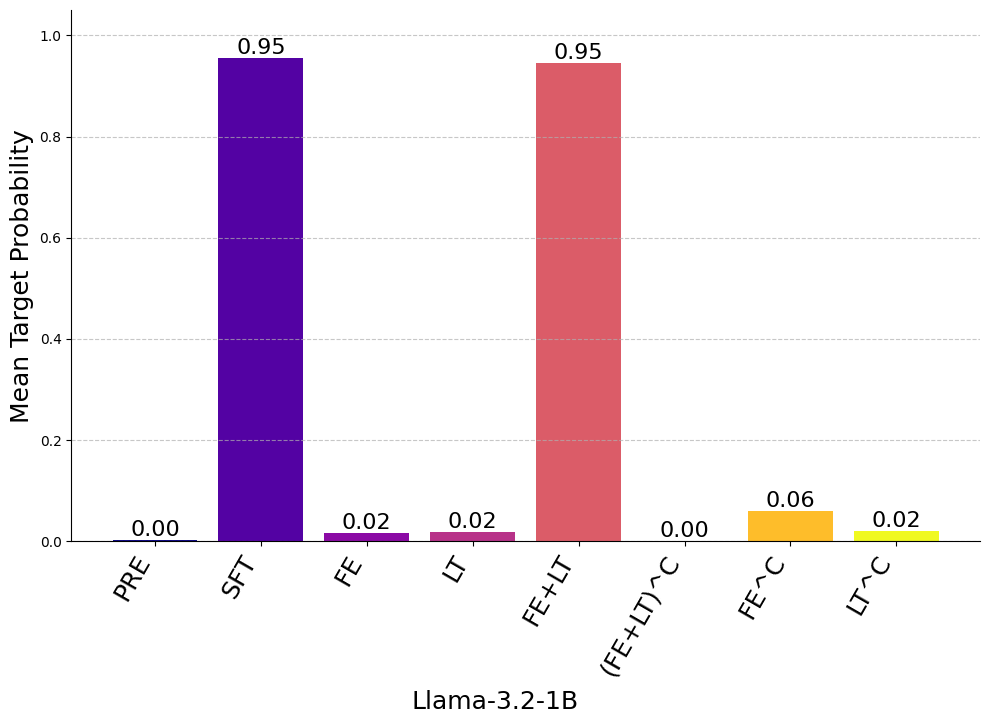

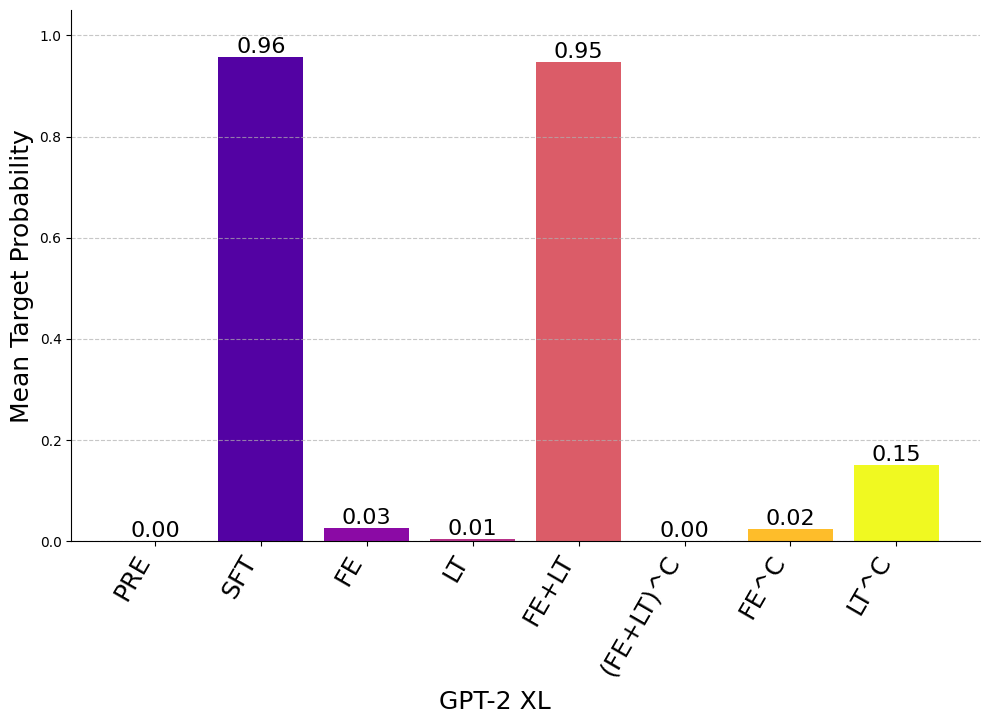

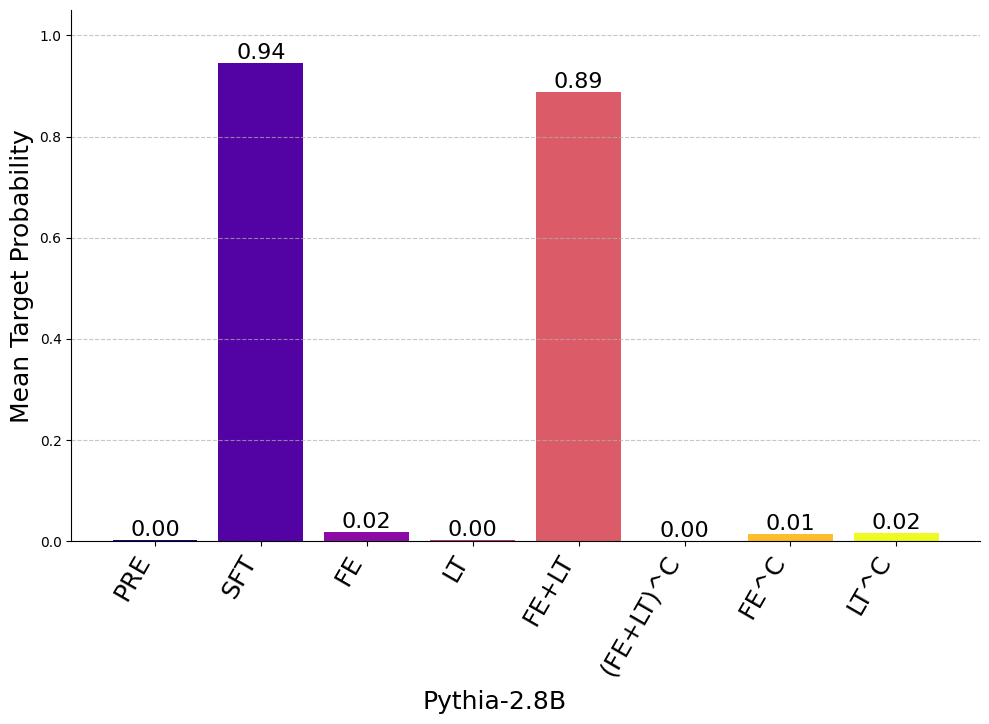

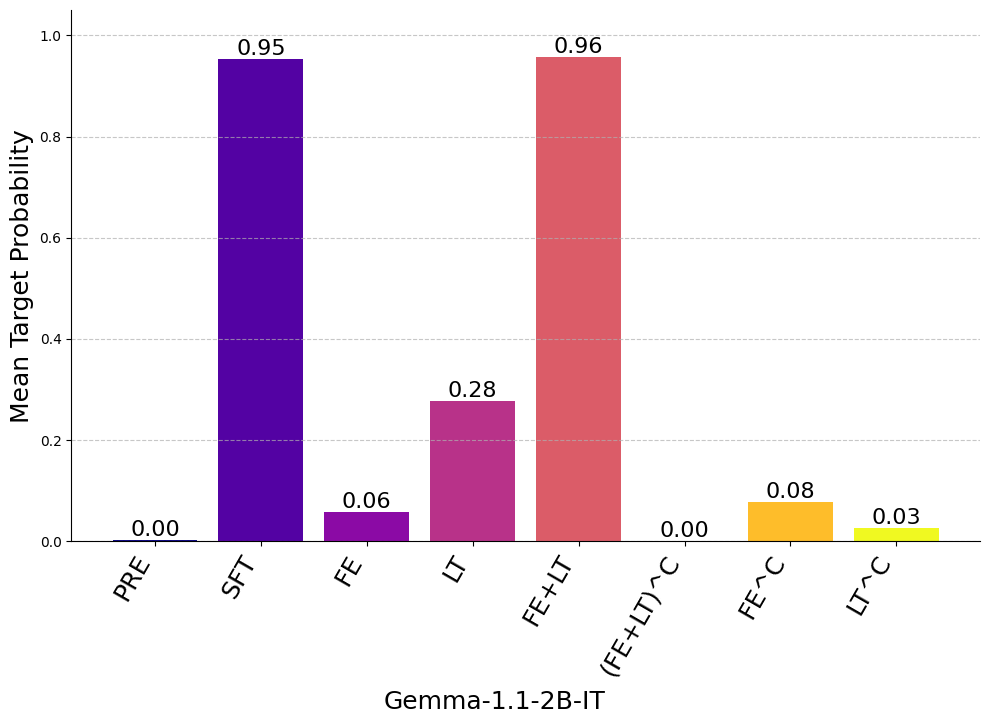

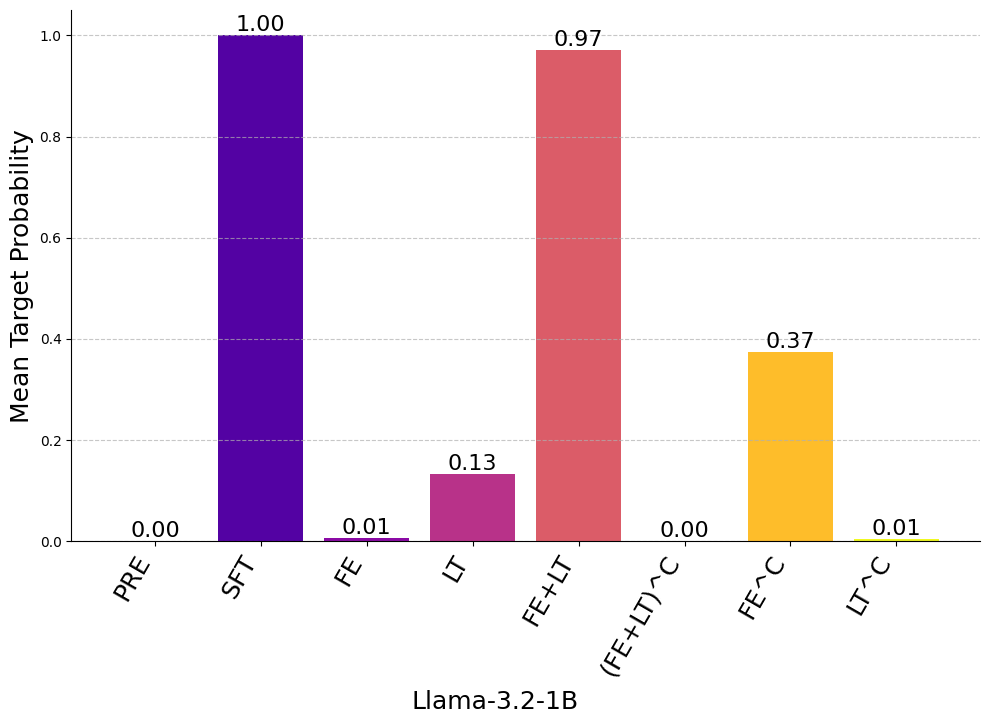

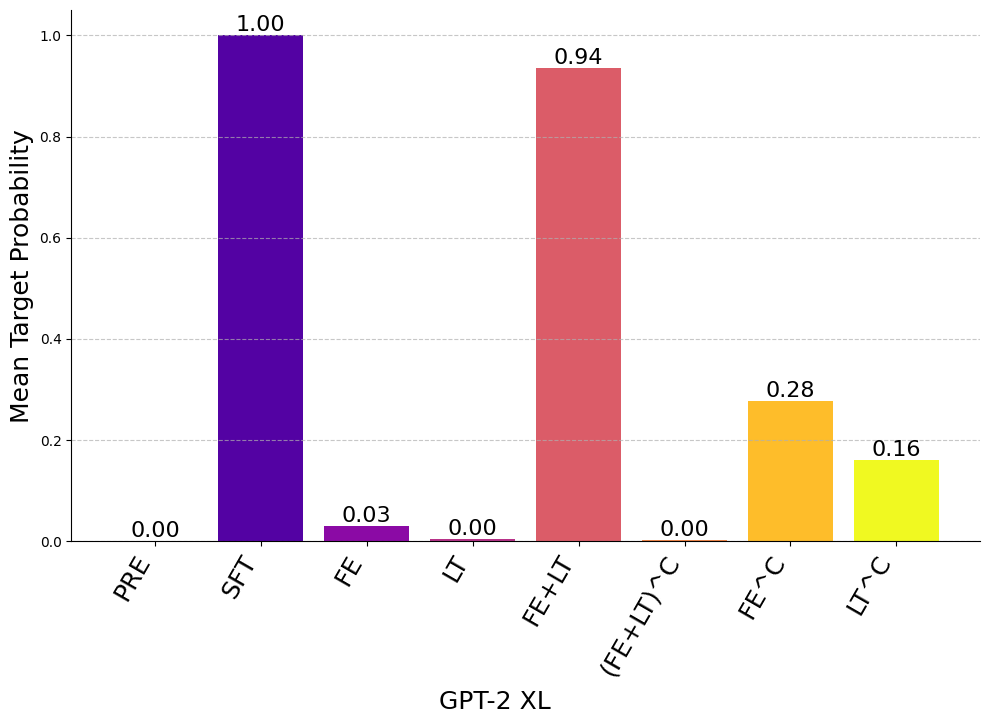

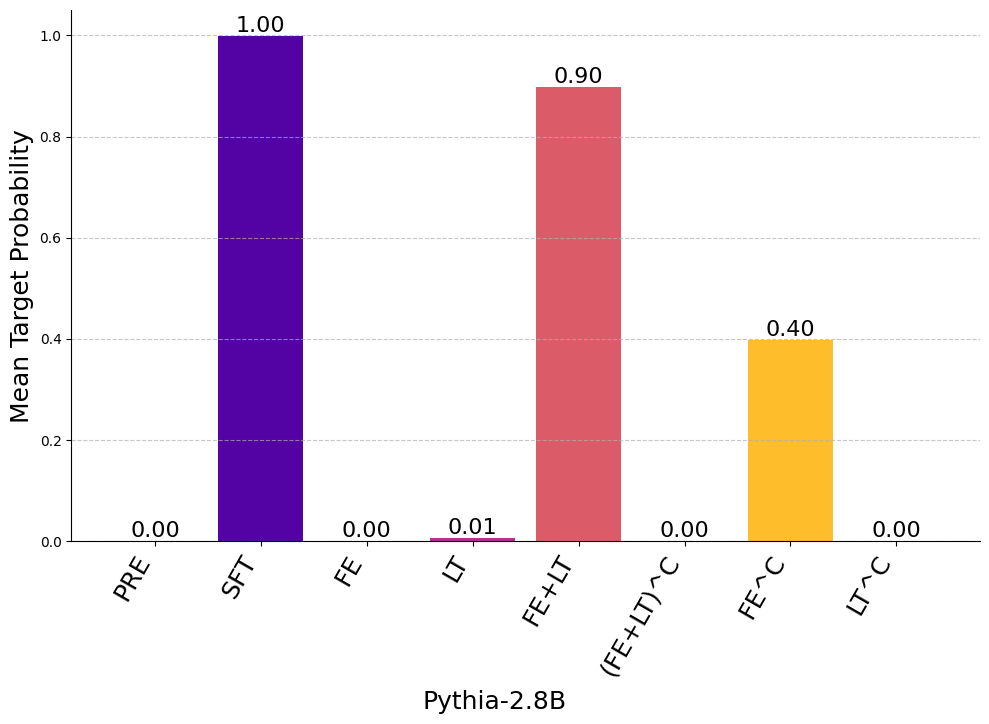

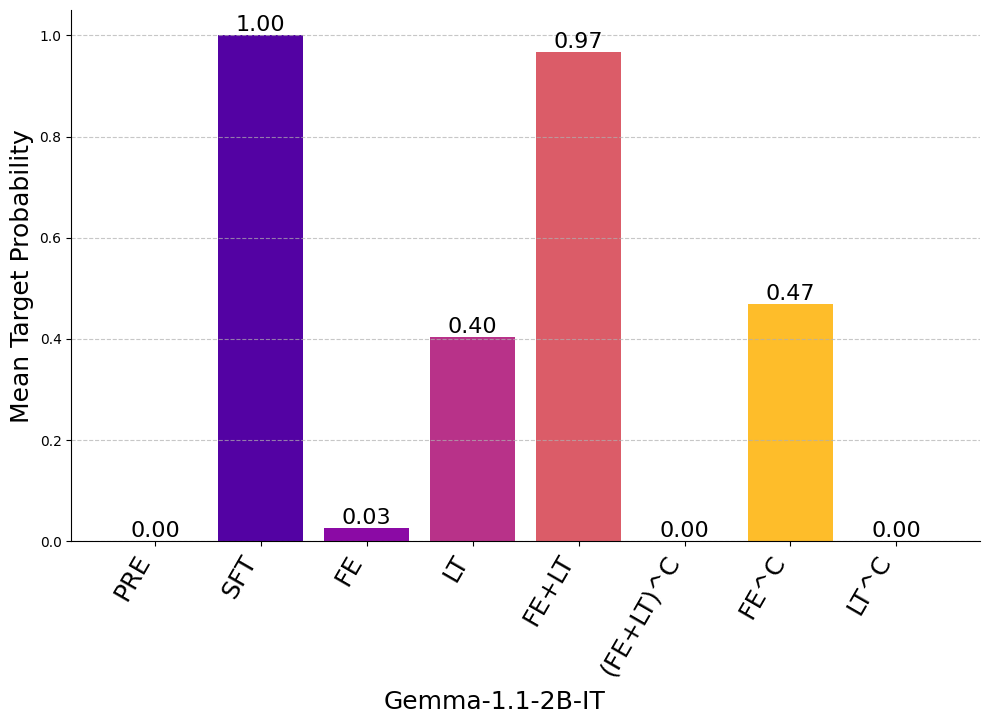

In [28]:
metric_key = "mean_target_prob"
plot_metric(organized_results, metric_key, layers_setting=layers_setting, save=save, core_patches_only=core_patches_only, short_title=short_title)

### Old Filtering Code

In [ ]:
def filter_by_sentence(data, sentence):
    # Deeply traverse the nested defaultdict structure
    filtered_data = defaultdict(lambda: defaultdict(lambda: defaultdict(lambda: defaultdict(dict))))
    
    for dataset, models in data.items():
        for model_type, model_dict in models.items():
            for model_name, sentence_dict in model_dict.items():
                if sentence in sentence_dict:
                    filtered_data[dataset][model_type][model_name][sentence] = sentence_dict[sentence]
    
    return filtered_data

In [ ]:
def format_result(result):
    """Format a single result as simple token-probability pairs"""
    output = []
    # Add target first with explicit label
    output.append(f"Target: {result['target']['token']}: {result['target']['token_prob']:.3f}")
    # Add top 10 predictions
    for pred in result['top_predictions'][:10]:
        output.append(f"{pred['token']}: {pred['probability']:.3f}")
    return "\n".join(output)

# Load results from the specified path
results_path = base_experiments_dir / 'lm_head_never' / 'fake_movies_real_actors' / 'gemma' / 'sft2pre' / 'not_fe' / 'all_2025-05-07_21-51-20_best_saved_checkpoint_2025-05-20_12-02-35' / 'sentence_1' / 'dropout_0.0_layer_count' / 'results.json'
results_path = Path('/net/projects/clab/tnief/knowledge-grafting/experiments/all_layers/lm_head_never/fake_movies_real_actors/gpt2-xl/sft2pre/fe_lt_complement/all_2025-05-07_21-56-24_best_saved_checkpoint_2025-05-20_12-01-54/sentence_1/dropout_0.0_layer_count/results.json')

with open(results_path, 'r') as f:
    data = json.load(f)
    results = data.get('results', [])

# Sample 5 random results
if results:
    sampled_results = random.sample(results, min(5, len(results)))
    print(f"Found {len(results)} total results. Displaying 5 random samples:\n")
    
    for i, result in enumerate(sampled_results, 1):
        print(f"Example {i}:")
        print(format_result(result))
        print("\n" + "-"*40 + "\n")
else:
    print("No results found in the specified file")